In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_file_path = 'penguins.csv'
data_df = pd.read_csv(data_file_path)
data_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
data_df = data_df.dropna()
data_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [4]:
from sklearn.utils import shuffle
data_df = shuffle(data_df)

In [5]:
y = data_df["species"].values
x = data_df.drop(["island","sex","species"],axis=1)
x.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
229,46.8,15.4,215.0,5150.0
158,46.1,18.2,178.0,3250.0
90,35.7,18.0,202.0,3550.0
209,49.3,19.9,203.0,4050.0
275,45.0,15.4,220.0,5050.0


In [6]:
print(data_df.groupby('species').size())

species
Adelie       146
Chinstrap     68
Gentoo       120
dtype: int64


In [7]:
!pip install imbalanced-learn

In [8]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[2 1 0 1 2 1 2 1 2 2 0 2 0 0 1 2 2 0 0 1 1 2 2 0 2 0 1 0 2 2 2 0 2 0 0 2 0
 0 2 1 0 0 0 0 2 0 2 2 0 1 0 0 0 0 0 2 2 2 0 0 2 0 2 1 2 1 0 1 0 0 2 2 1 0
 2 0 0 0 1 0 0 0 2 1 0 0 0 0 1 0 0 0 0 2 2 0 0 2 2 1 0 2 2 0 1 2 2 0 2 0 0
 0 2 0 0 0 1 2 2 0 1 1 0 2 0 0 1 2 1 0 2 1 1 0 2 2 0 1 2 0 1 2 2 1 0 2 2 2
 0 2 2 0 2 0 1 0 2 2 2 1 2 2 1 2 1 0 0 0 1 0 0 1 0 0 2 0 2 0 1 0 2 0 2 0 0
 0 1 2 1 1 2 1 0 2 1 1 1 0 0 2 0 2 2 1 2 1 0 0 0 0 0 2 2 1 0 1 2 2 2 2 0 0
 0 2 2 0 2 0 2 2 1 0 1 0 2 0 1 2 2 2 1 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0
 1 2 1 1 2 2 2 2 1 2 0 0 2 0 2 1 1 0 2 2 2 0 1 2 0 1 0 0 2 2 0 0 2 1 0 2 1
 0 1 2 0 0 0 0 0 2 2 2 1 0 2 0 2 1 0 1 0 0 0 0 1 2 0 1 1 0 2 2 0 0 0 2 2 2
 2]


In [9]:
#from sklearn.preprocessing import StandardScaler
#ss = StandardScaler()
#x = ss.fit_transform(x)

In [10]:
#Divide into training and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) # 70% training and 30% test


SMOTE

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [19]:
print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print("After OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_res==0)))

print('Before OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

Before OverSampling, counts of label '2': 79
Before OverSampling, counts of label '1': 48
Before OverSampling, counts of label '0': 106 

After OverSampling, counts of label '2': 106
After OverSampling, counts of label '1': 106
After OverSampling, counts of label '0': 106 

Before OverSampling, the shape of train_X: (233, 4)
Before OverSampling, the shape of train_y: (233,) 

After OverSampling, the shape of train_X: (318, 4)
After OverSampling, the shape of train_y: (318,) 



In [14]:
train_score = []
test_score = []
k_vals = []

for k in range(1, 21):
    k_vals.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    tr_score = knn.score(X_train, y_train)
    train_score.append(tr_score)
    
    te_score = knn.score(X_test, y_test)
    test_score.append(te_score)

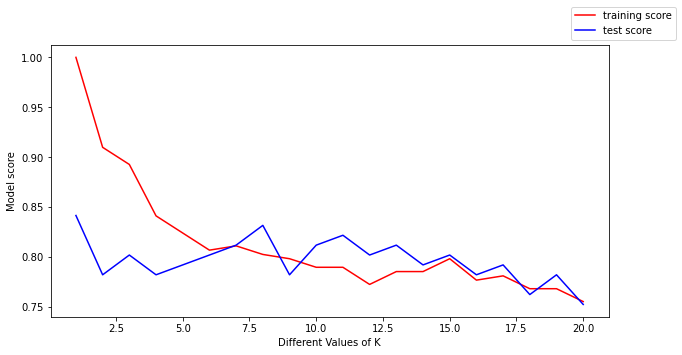

In [15]:
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Model score')
plt.plot(k_vals, train_score, color = 'r', label = "training score")
plt.plot(k_vals, test_score, color = 'b', label = 'test score')
plt.legend(bbox_to_anchor=(1, 1),
           bbox_transform=plt.gcf().transFigure)
plt.show()

In [16]:
knn = KNeighborsClassifier(n_neighbors = 7)

#Fit the model
knn.fit(X_train,y_train)

#get the score
knn.score(X_test,y_test)

0.8118811881188119